In [ ]:
#  Essential Libraries
import numpy as np
import pandas as pd

# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm



In [ ]:
df=pd.read_csv('/content/data1.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:

df.shape

(48895, 16)

In [ ]:
#DUPP AND NULL
len(df[df.duplicated()])

0

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

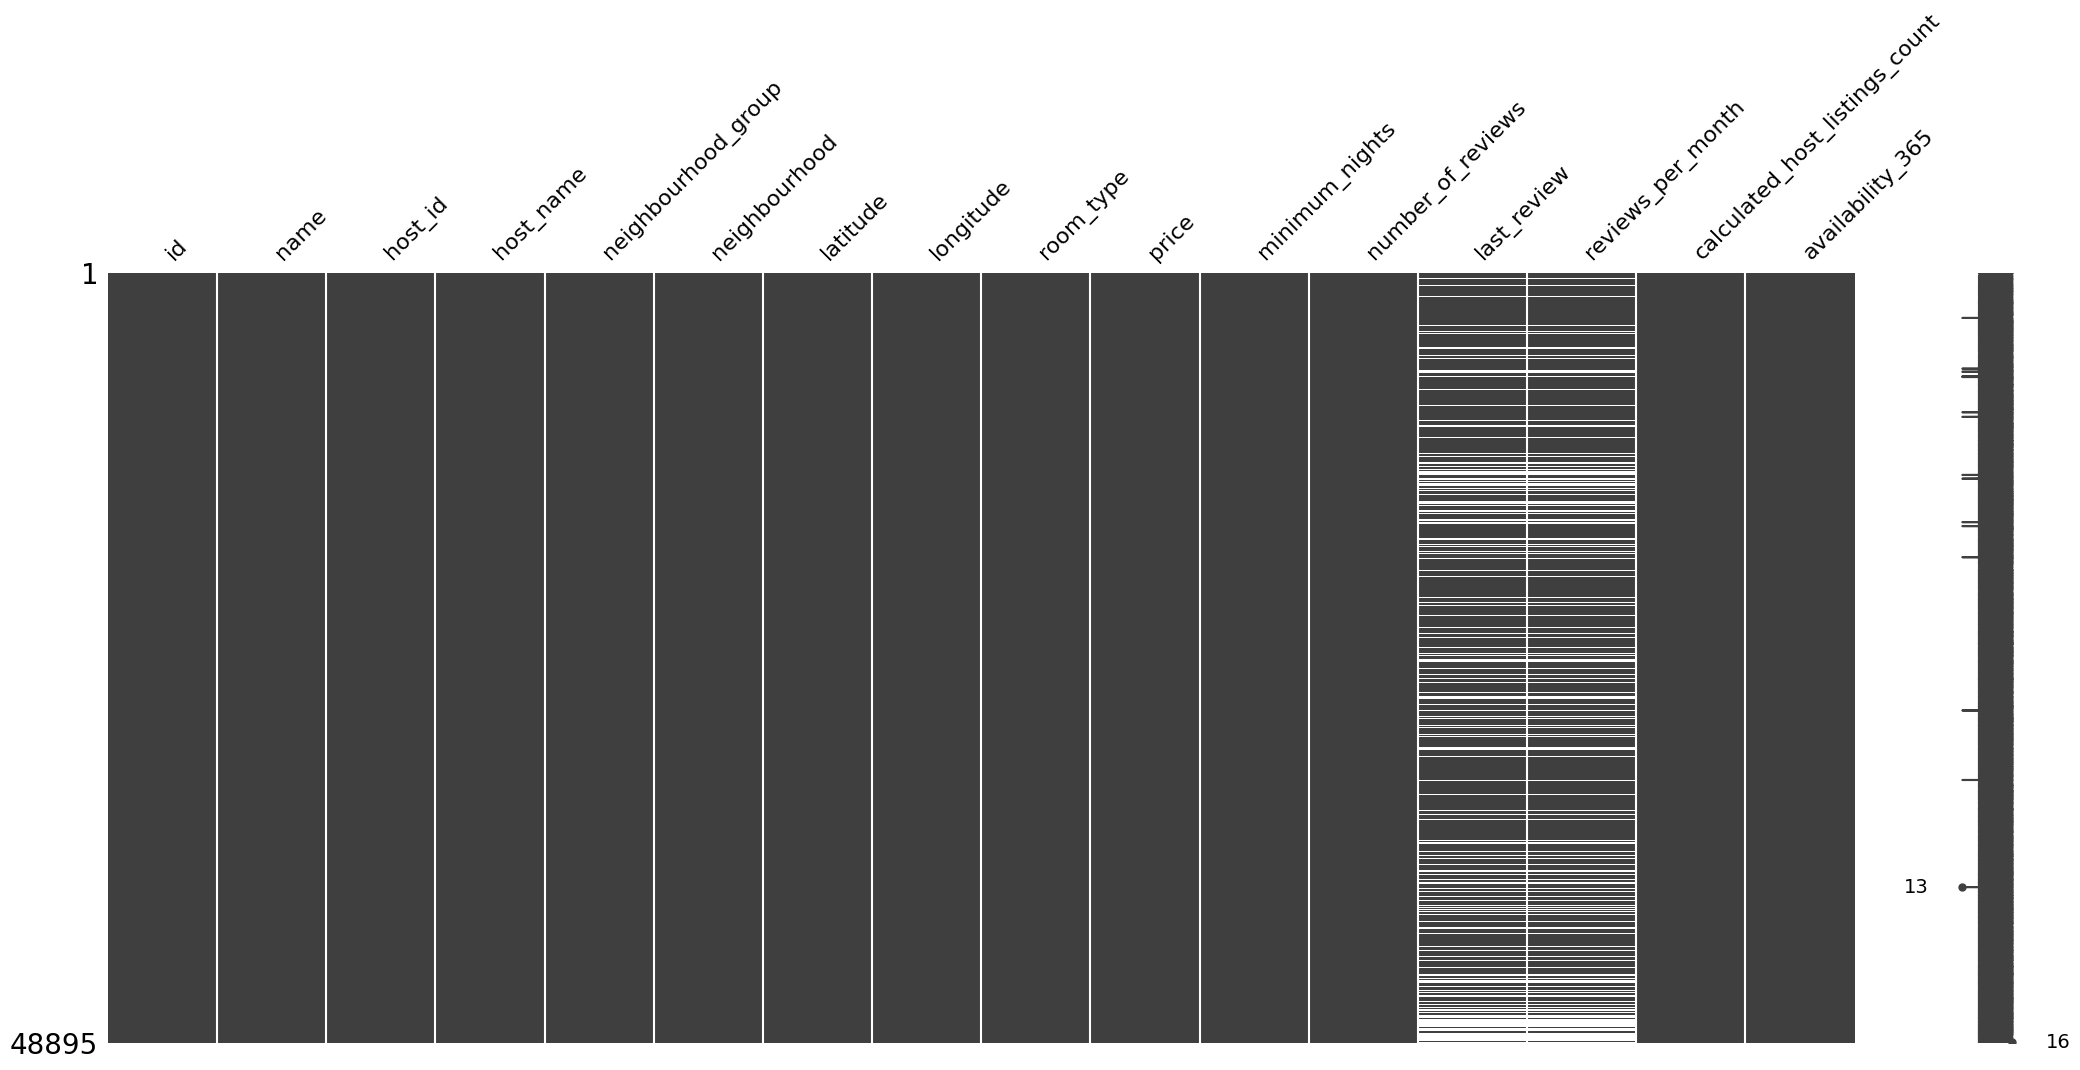

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
#column having least one nAAN value
df.loc[:,df.isna().sum()!=0][:5]

,name,host_name,last_review,reviews_per_month
0,Clean & quiet apt home by the park,John,2018-10-19,0.21
1,Skylit Midtown Castle,Jennifer,2019-05-21,0.38
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,NaN,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,2019-07-05,4.64
4,Entire Apt: Spacious Studio/Loft by central park,Laura,2018-11-19,0.10


In [ ]:
def show_missing(df):
    #  columns with missing values
    missing_columns = df.columns[df.isnull().any()].tolist()

    # missing data statistics
    missing_count = df[missing_columns].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100

    #  missing data statistics
    missing_val_df = pd.DataFrame({
        'Missing Data Count': missing_count,
        'Missing Data Percentage': missing_percentage
    }).sort_values(by='Missing Data Count', ascending=False)

    return missing_val_df
print(show_missing(df))

                   Missing Data Count  Missing Data Percentage
last_review                     10052                20.558339
reviews_per_month               10052                20.558339
host_name                          21                 0.042949
name                               16                 0.032723


In [ ]:
# Unique Values for each variable.
df.nunique()


id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
print(df.dtypes)


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [ ]:
#changing data type for last review
df['last_review'] = pd.to_datetime(df['last_review'], infer_datetime_format=True)

#calculating total count of observation where number of review is equal to 0
len(df[df['number_of_reviews']== 0])

<ipython-input-18-7027d564fd63>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['last_review'] = pd.to_datetime(df['last_review'], infer_datetime_format=True)


10052

In [ ]:
df['name'].fillna('not known',inplace = True)
df['host_name'].fillna('not known',inplace = True)

#replacing numerical value for reviews per month with 0 as number of review is 0 for those values
df['reviews_per_month'].fillna(0,inplace = True)

In [ ]:
#dropping last review and id it can only provide information about the timeliness of the data being analyzed
df.drop(['id', 'last_review'], axis=1,inplace = True)
df.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# median of the feature price
median = df['price'].median()

# Replace 0 with the median
df['price'].replace(0, median, inplace=True)

In [ ]:
len(df[df['price']== 0])

0

In [ ]:
#number of potential booking each can take and reveunr
df['number_of_bookings'] = (df['availability_365'] / df['minimum_nights']).astype(int)
df['potential_revenue_per_year'] = df['number_of_bookings']* df['price']
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_bookings,potential_revenue_per_year
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,365,54385
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,355,79875
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,121,18150
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,194,17266
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,0,0


In [ ]:
#finding unique neighbourhood names and room type for each group
count = 0
for i in df.neighbourhood_group.unique():
  count= count+1
  print(f'{count}. {i} has room type {df.room_type.unique()}')

1. Brooklyn has room type ['Private room' 'Entire home/apt' 'Shared room']
2. Manhattan has room type ['Private room' 'Entire home/apt' 'Shared room']
3. Queens has room type ['Private room' 'Entire home/apt' 'Shared room']
4. Staten Island has room type ['Private room' 'Entire home/apt' 'Shared room']
5. Bronx has room type ['Private room' 'Entire home/apt' 'Shared room']


In [ ]:
#finding mean and median based on neghbourhood_group and room_type with each column of intrest,is two columns effected with respect to all others
result = df.groupby(['neighbourhood_group', 'room_type']).agg({
    'price': ['mean', 'median', 'min', 'max', 'sum'],
    'number_of_reviews': ['mean', 'median', 'min', 'max', 'sum'],
    'reviews_per_month': ['mean', 'median', 'min', 'max', 'sum'],
    'calculated_host_listings_count': ['mean', 'median', 'min', 'max', 'sum'],
    'number_of_bookings': ['mean', 'median', 'min', 'max', 'sum'],
    'potential_revenue_per_year': ['mean', 'median', 'min', 'max', 'sum']
}).T

print(result)

neighbourhood_group                             Bronx                \
room_type                             Entire home/apt  Private room   
price                          mean      1.275066e+02  6.695092e+01   
                               median    1.000000e+02  5.400000e+01   
                               min       2.800000e+01  1.000000e+01   
                               max       1.000000e+03  2.500000e+03   
                               sum       4.832500e+04  4.365200e+04   
number_of_reviews              mean      3.067810e+01  2.501840e+01   
                               median    1.100000e+01  9.000000e+00   
                               min       0.000000e+00  0.000000e+00   
                               max       2.710000e+02  3.210000e+02   
                               sum       1.162700e+04  1.631200e+04   
reviews_per_month              mean      1.824749e+00  1.319371e+00   
                               median    1.190000e+00  7.750000e-01   
      

In [ ]:
#finding total review when price is maximum when u pay more does it impact reviews or no
df_max_reviews = df[df['price'] == df['price'].max()].groupby('neighbourhood_group')[[
    'reviews_per_month','number_of_bookings']].sum().reset_index().sort_values(
        'reviews_per_month', ascending = False)
max_price = df['price'].max()
print(f'Maximum Price for each Group is {max_price}')
df_max_reviews

Maximum Price for each Group is 10000


,neighbourhood_group,reviews_per_month,number_of_bookings
0,Brooklyn,0.16,0
2,Queens,0.04,0
1,Manhattan,0.00,2


In [ ]:
#finding total review when price is minimum do people ignore feedback when they pay less and does it increase booking or no
df_min_reviews = df[df['price'] == df['price'].min()].groupby('neighbourhood_group')[[
    'reviews_per_month','number_of_bookings']].sum().reset_index().sort_values(
        'reviews_per_month', ascending = False)
Min_price = df['price'].min()
print(f'Minimum Price for each Group is {Min_price}')
df_min_reviews

Minimum Price for each Group is 10


,neighbourhood_group,reviews_per_month,number_of_bookings
1,Brooklyn,8.30,119
3,Queens,3.85,443
2,Manhattan,3.54,4
0,Bronx,0.00,180


In [ ]:
#finding for price above min and below max
df_between_max_min = df[(df['price'] > df['price'].min()) & (
    df['price'] < df['price'].max())].groupby('neighbourhood_group')[[
    'reviews_per_month','number_of_bookings']].sum().reset_index().sort_values(
        'reviews_per_month', ascending = False)
print(f'Price range for each Group is {Min_price} - {max_price}')# min and max price
df_between_max_min

Price range for each Group is 10 - 10000


,neighbourhood_group,reviews_per_month,number_of_bookings
2,Manhattan,21154.54,947823
1,Brooklyn,21096.52,927478
3,Queens,8875.16,492366
0,Bronx,1609.94,103691
4,Staten Island,587.99,40880


In [ ]:
#considering only those reviews which are more than average and price range between min and max
df_above_avg_reviews = df[(df['reviews_per_month']> df['reviews_per_month'].mean()) &
    (df['price'] > df['price'].min()) & (df['price'] < df['price'].max())].groupby(
    'neighbourhood_group')[['reviews_per_month','number_of_bookings']].sum().reset_index().sort_values(
        'reviews_per_month', ascending = False)
avg = df['reviews_per_month'].mean()
print(f'Average Review: {avg}')
df_above_avg_reviews

Average Review: 1.0909099089886491


,neighbourhood_group,reviews_per_month,number_of_bookings
1,Brooklyn,17449.92,505182
2,Manhattan,17432.50,492586
3,Queens,7948.32,293765
0,Bronx,1428.36,56406
4,Staten Island,506.88,22537


In [ ]:
#based on avg reviews per month creating poor and good engagement
df['review_quality'] = df['reviews_per_month'].apply(
    lambda x:'Poor Engagement'  if x < df['reviews_per_month'].mean() else 'Good Engagement')

In [ ]:
#checking number of booking based on review quality
pd.DataFrame(df.groupby('review_quality')['number_of_bookings'].value_counts().reset_index(name='Count')).tail()

,review_quality,number_of_bookings,Count
715,Poor Engagement,313,1
716,Poor Engagement,219,1
717,Poor Engagement,258,1
718,Poor Engagement,261,1
719,Poor Engagement,263,1


In [ ]:
#average price for airbnb which has good engagement but actual booking is 0
df_good = df[(df['number_of_bookings']==0) & (df['review_quality']=='Good Engagement')]
df_good['price'].mean()

113.83645443196005

In [ ]:
#average price for airbnb which has poor engagement but more than 200 booking
df_bad = df[(df['number_of_bookings']>200) & (df['review_quality']=='Poor Engagement')]
df_bad['price'].mean()

224.94391244870042

In [ ]:
#function to filter host with number of booking more than 0 and show good engagement
# Define the function to filter hosts
def good_host(df):
    return df[(df['number_of_bookings'] > 0) & (df['review_quality'] == 'Good Engagement')]

# Apply the filter to the entire DataFrame and then group by host_id and host_name
df_good_host = good_host(df).groupby(['host_id', 'host_name'])

# If you need to perform further operations on the grouped data, you can do so now.
# For example, to get the DataFrame back from the groupby object, use:
df_good_host = df_good_host.apply(lambda x: x)

# Print the result
print(df_good_host)


                                                                          name  \
host_id   host_name                                                              
2881      Loli        7875                 Newly renovated historic brownstone   
                      8302               Historic room in renovated brownstone   
3867      Luke        8283   Huge private bedroom for quiet sleep in Manhat...   
                      14656  Queen bed & Air Conditioning, views of Chatham Sq   
4396      Casey       69                Large Room in Amazing East Village Apt   
...                                                                        ...   
271928929 Asil        48252                     Cozy Apartment in Midtown West   
272314085 Biagio      48344  Super Cool & Friendly Pad in Prime AreaofBushwick   
272327753 Robert      48351                                      A homey home.   
273361532 David & Amy 48634   One bedroom without roomies, close to everything   
273841667 Blaine

In [ ]:
#creating copy and to make changes as it will be have host id and host name as column and row
df_good_host2 =  df_good_host.copy()
df_good_host2.drop(columns=['host_id','host_name'],inplace=True)
df_good_host2 = df_good_host2.reset_index()
df_good_host2.drop(columns=['level_2'],inplace=True)

In [ ]:
#finding top 5 host with maximum booking and average price and minimum nights
#for their booking with good engagement
agg_dict = {'minimum_nights':'min','number_of_bookings':'sum','price':'mean'}
df_good_host2.groupby(['host_id','host_name']).agg(agg_dict).reset_index().sort_values(
    'number_of_bookings',ascending = False)[:5]

,host_id,host_name,minimum_nights,number_of_bookings,price
9217,219517861,Sonder (NYC),2,22422,287.993590
9364,224414117,Gabriel,1,5610,213.000000
7227,119669058,Melissa,1,4890,56.136364
3290,16677326,Alex And Zeena,1,4193,85.000000
294,344035,Brooklyn& Breakfast -Len-,1,3723,60.000000


In [ ]:
#creating bar plot function
def barPlot(df,X,Y):
  plt.figure(figsize=(15,8));
  ax = sns.barplot(data = df,x= X, y = Y);
  # ax.bar_label(ax.containers[0]);  will work other than google colab

  # Add labels to the bars
  for bar in ax.patches:
      ax.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')

  # Set the font size of the tick labels to 12
  ax.tick_params(axis='both', which='major', labelsize=18);
  return ax

In [ ]:
import plotly.express as px

fig = px.histogram(df, x="price")
fig.show()


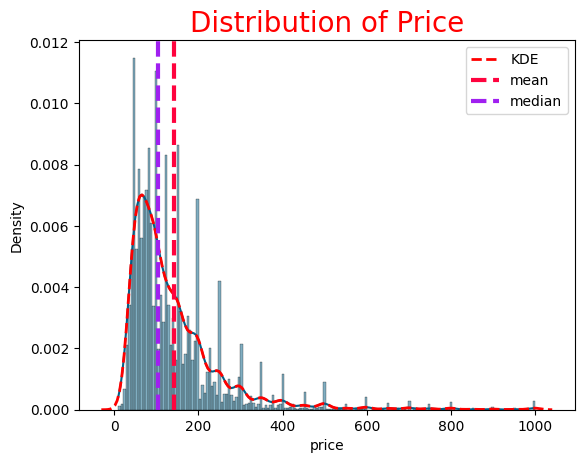

In [ ]:


# Filter the DataFrame for prices less than or equal to 1000
price_less_than_1000 = df[df['price'] <= 1000]

# Define the column for price
col = 'price'

# Plot the histogram and fit a normal distribution
sns.histplot(price_less_than_1000[col], color='#055E85', kde=True, stat="density")
sns.kdeplot(price_less_than_1000[col], color='red', linestyle='--', linewidth=2, label='KDE')

#  the mean and median
feature = price_less_than_1000[col]
plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3, label='mean')  # Rose-Red color indicating the mean of data
plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3, label='median')  # Purple indicating the median of data

# tittkes
plt.legend(loc='upper right')
plt.title('Distribution of Price', fontsize=20, color='red')

# Show the plot
plt.show()


In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]

# Remove the outliers from the dataset
df_clean = df[((df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR)))]

In [ ]:
col = 'price'
sns.distplot(df_clean[col], color = '#055E85',fit = norm);
feature = df_clean[col]
plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #Rose-Red Color indicate mean of data
plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #Cyan indicate median of data

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'up')
# Add a title to the plot with custom font size and color
plt.title('Distribution of Price', fontsize=20, color='red')

# Show the plot
plt.show()

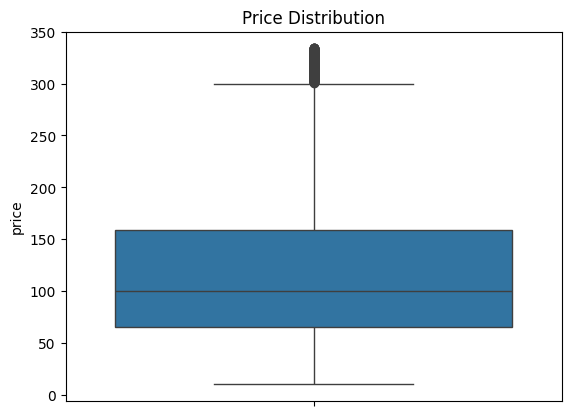

In [ ]:
#box plot for outlier visualization
sns.boxplot(y='price', data=df_clean).set_title('Price Distribution');

In [ ]:
#popular neighbourhood

In [ ]:
# Create a DataFrame with the count of each neighbourhood group



ddf_new = df['neighbourhood_group'].value_counts().reset_index().rename(
    columns={'index': 'neighbourhood_group', 'neighbourhood_group': 'count'}
)

# Check the columns of df_new
print(df_new.columns)

# Plotting the pie plot for neighbourhood_group using Plotly
# Use 'neighbourhood_group' column for names
fig = px.pie(df_new, values='count', names='neighbourhood_group', title='Distribution of Neighbourhood Groups')

# Update trace to show percentage and label inside the pie chart
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the plot
fig.show()

In [ ]:
#popular host

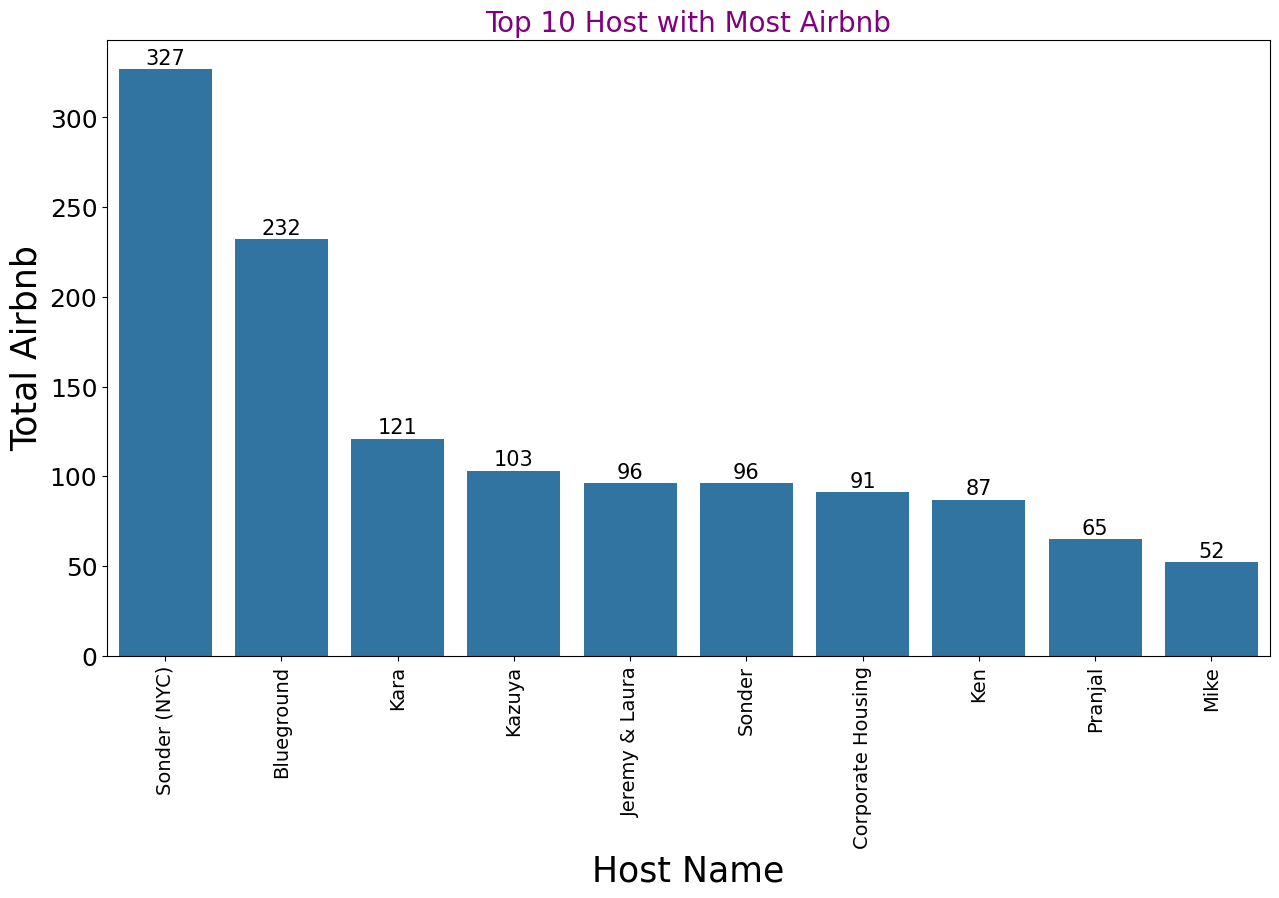

In [ ]:

#groupby all host id to know top 10 host
df_popular_host = df.groupby(['host_id','host_name'])['calculated_host_listings_count'
                                ].max().reset_index().sort_values(
                            'calculated_host_listings_count',ascending = False)[:10]
# Chart - 3 visualization code
#barplot
ax = barPlot(df_popular_host,'host_name','calculated_host_listings_count')
# Set the x-label with a font size of 25
ax.set_xlabel("Host Name", fontsize=25)
plt.xticks(fontsize = 14, rotation = 90);

# Set the y-label with a font size of 25
ax.set_ylabel("Total Airbnb", fontsize=25)
plt.title('Top 10 Host with Most Airbnb', fontsize=20, color='purple');

In [ ]:
#Price Point of neighbourhood_group

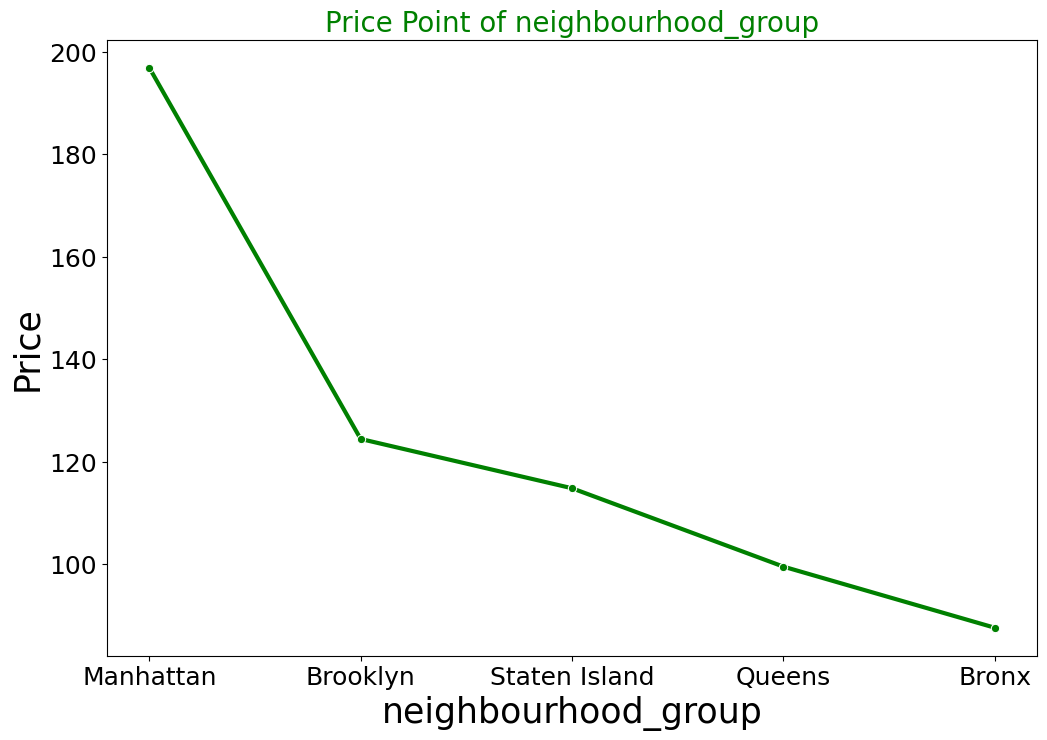

In [ ]:
df_avg_price = df.groupby('neighbourhood_group')['price'].mean().reset_index().sort_values(
    'price',ascending = False)

#line plot
plt.figure(figsize=(12,8));

ax = sns.lineplot(data = df_avg_price,x='neighbourhood_group', y = 'price',
  marker= 'o', color = 'green',linewidth=3);

# Set the font size of the tick labels to 12
ax.tick_params(axis='both', which='major', labelsize=18);
# Set the x-label with a font size of 25
ax.set_xlabel("neighbourhood_group", fontsize=25)

# Set the y-label with a font size of 25
ax.set_ylabel("Price", fontsize=25)
plt.title('Price Point of neighbourhood_group', fontsize=20, color='green');

In [ ]:
#customer engagement based on reviews

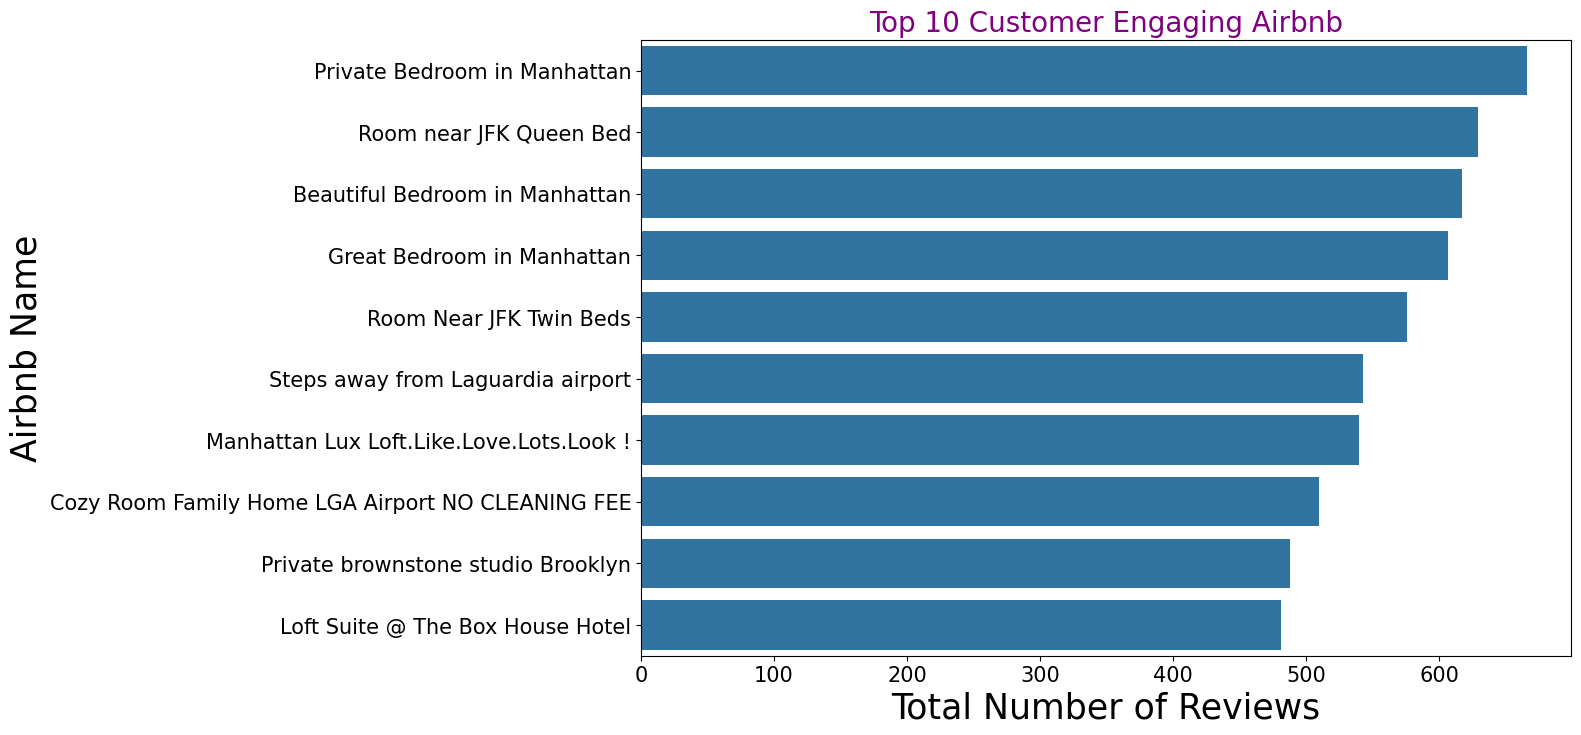

In [ ]:
df_engage = df.groupby(['name'])['number_of_reviews'].sum().reset_index().sort_values(
    'number_of_reviews',ascending = False)[:10]
#barplot
plt.figure(figsize=(12,8));
ax = sns.barplot(data = df_engage, y='name', x = 'number_of_reviews');
# ax.bar_label(ax.containers[0]);  will work other than google colab

# Set the font size of the tick labels to 12
ax.tick_params(axis='both', which='major', labelsize=15);
# Set the x-label with a font size of 25
ax.set_xlabel("Total Number of Reviews", fontsize=25)

# Set the y-label with a font size of 25
ax.set_ylabel("Airbnb Name", fontsize=25)
plt.title('Top 10 Customer Engaging Airbnb', fontsize=20, color='purple');

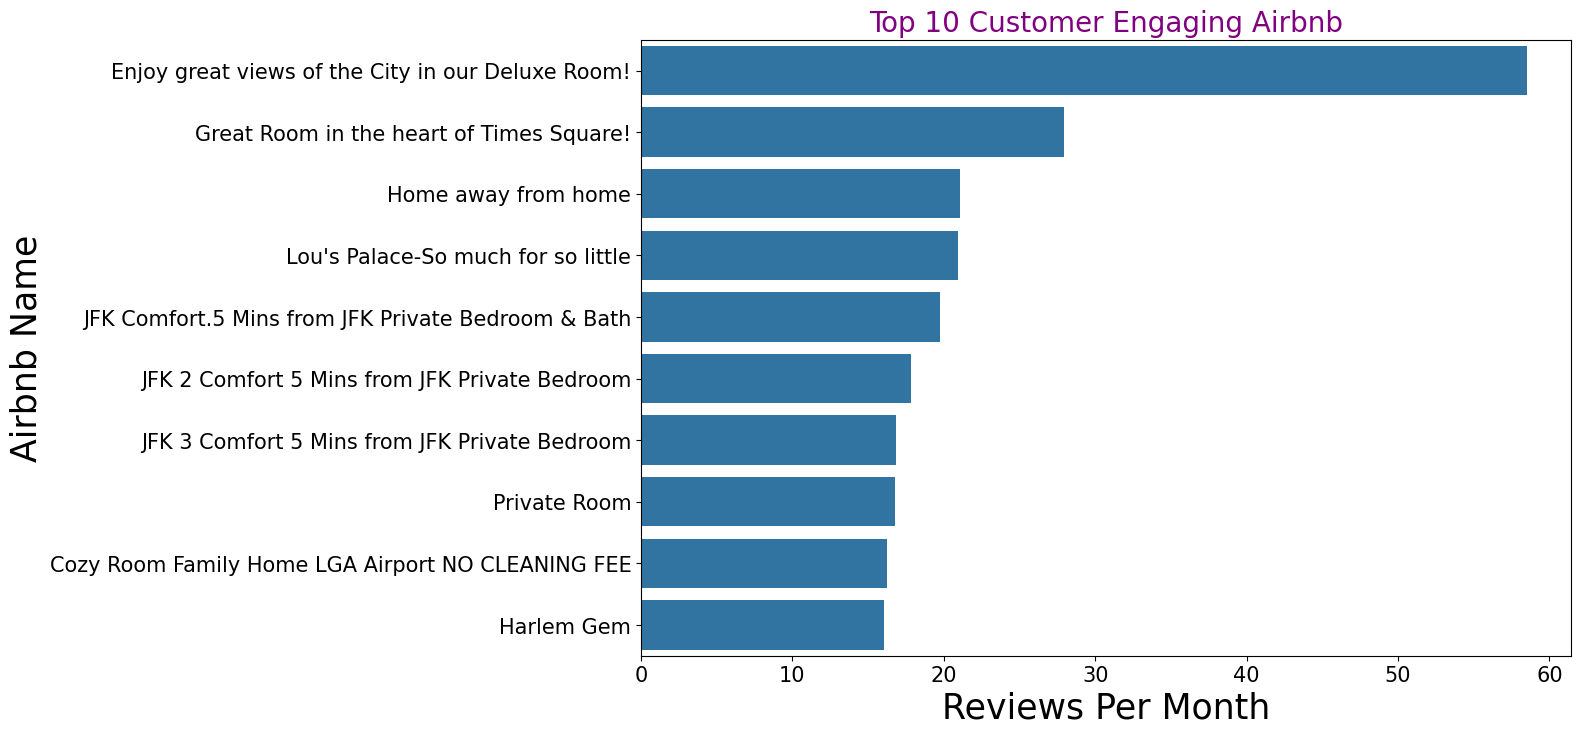

In [ ]:
#reviews_per_month
df_engage2 = df.groupby(['name'])['reviews_per_month'].sum().reset_index().sort_values(
    'reviews_per_month', ascending = False)[:10]
#barplot
plt.figure(figsize=(12,8));
ax = sns.barplot(data = df_engage2, y='name', x = 'reviews_per_month');
# ax.bar_label(ax.containers[0]);  will work other than google colab

# Set the font size of the tick labels to 12
ax.tick_params(axis='both', which='major', labelsize=15);
# Set the x-label with a font size of 25
ax.set_xlabel("Reviews Per Month", fontsize=25)

# Set the y-label with a font size of 25
ax.set_ylabel("Airbnb Name", fontsize=25)
plt.title('Top 10 Customer Engaging Airbnb', fontsize=20, color='purple');

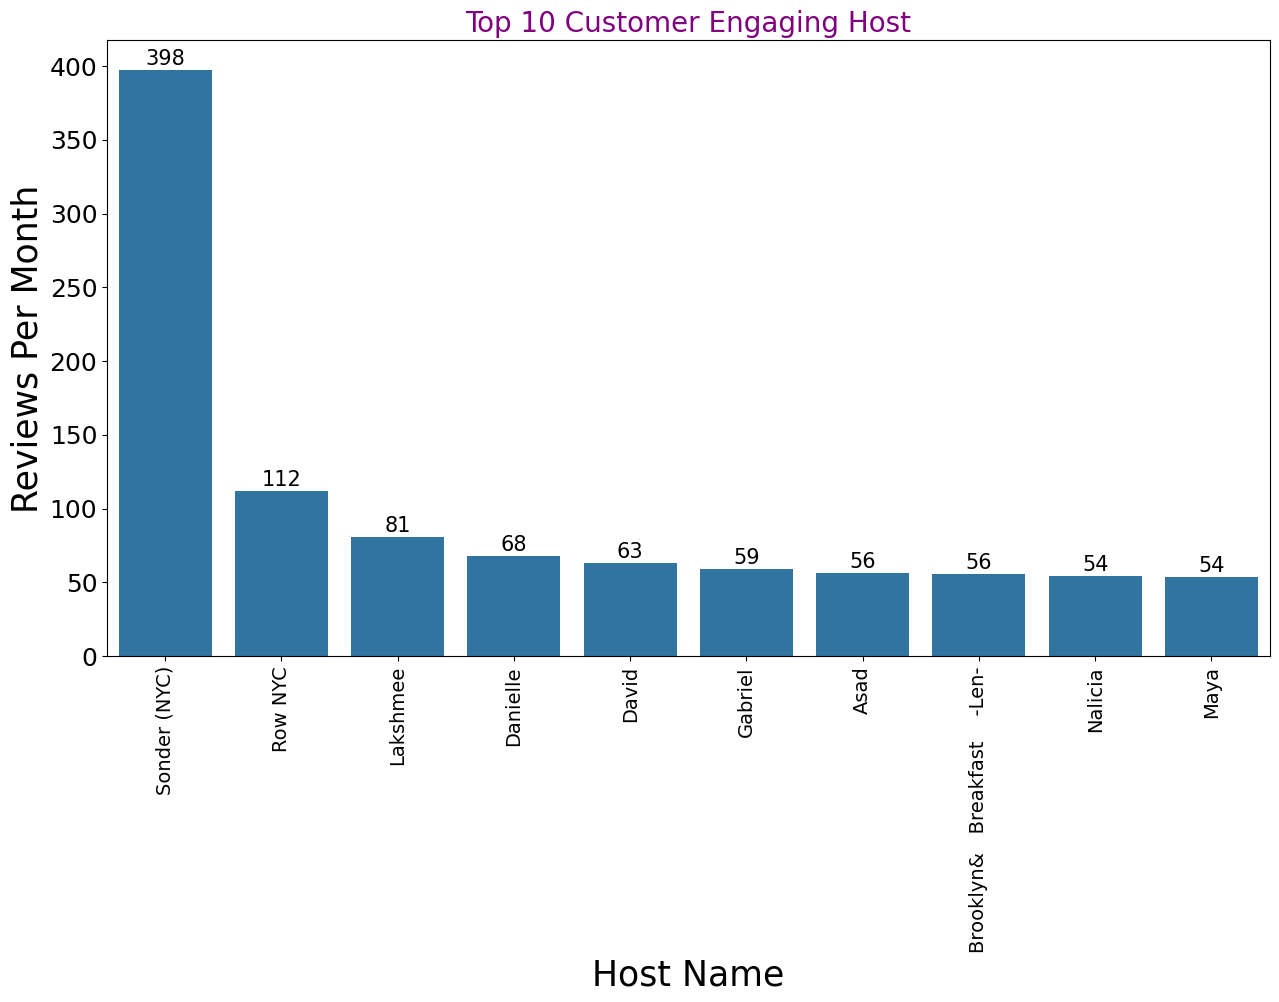

In [ ]:
#grouping all host id to know top 10 host
df_popular_host = df.groupby(['host_id','host_name'])['reviews_per_month'].sum().reset_index().sort_values(
                            'reviews_per_month',ascending = False)[:10]
#barplot
ax = barPlot(df_popular_host,'host_name', 'reviews_per_month');

# Set the x-label with a font size of 25
ax.set_xlabel("Host Name", fontsize=25)
plt.xticks(fontsize = 14, rotation = 90);

# Set the y-label with a font size of 25
ax.set_ylabel("Reviews Per Month", fontsize=25)
plt.title('Top 10 Customer Engaging Host', fontsize=20, color='purple');

In [ ]:
#posible reveune per year

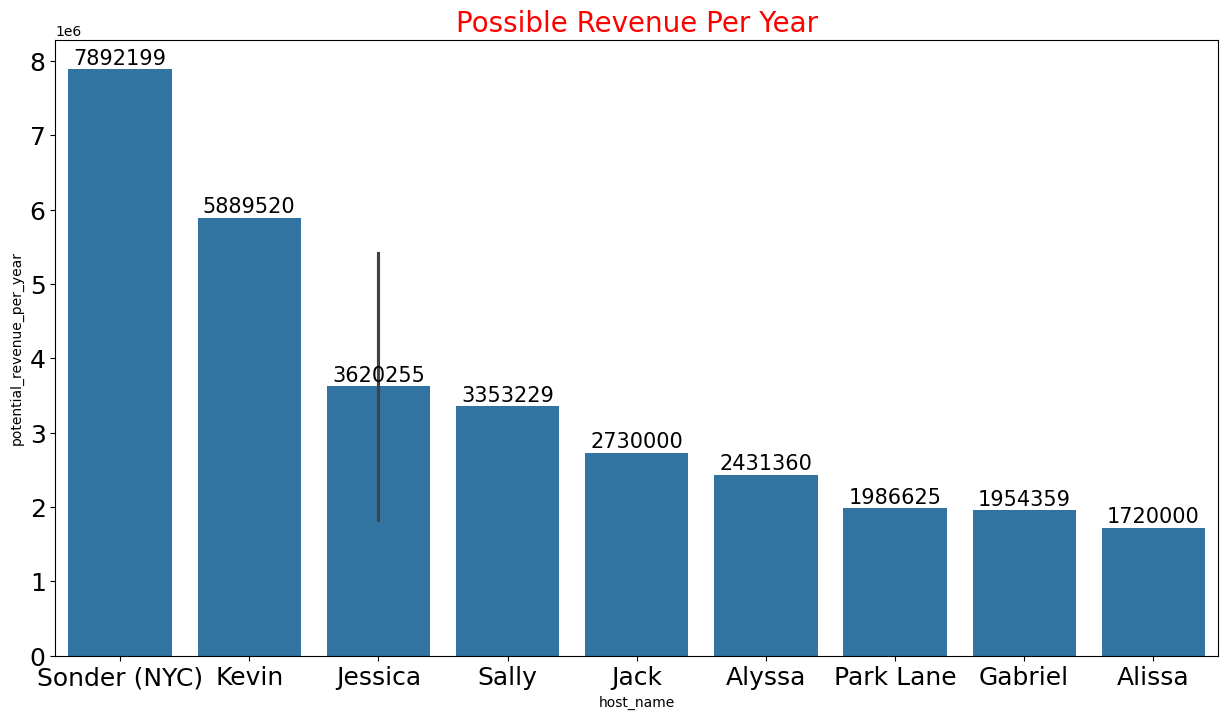

In [ ]:
df_revenue = df.groupby(['host_id','host_name'])[
    'potential_revenue_per_year'].sum().reset_index().sort_values(
        'potential_revenue_per_year', ascending = False)[:10]
# Chart - 7 visualization code
# plt.figure(figsize=(15,6));
barPlot(df_revenue, 'host_name', 'potential_revenue_per_year');
plt.title('Possible Revenue Per Year',fontsize=20,color='red');

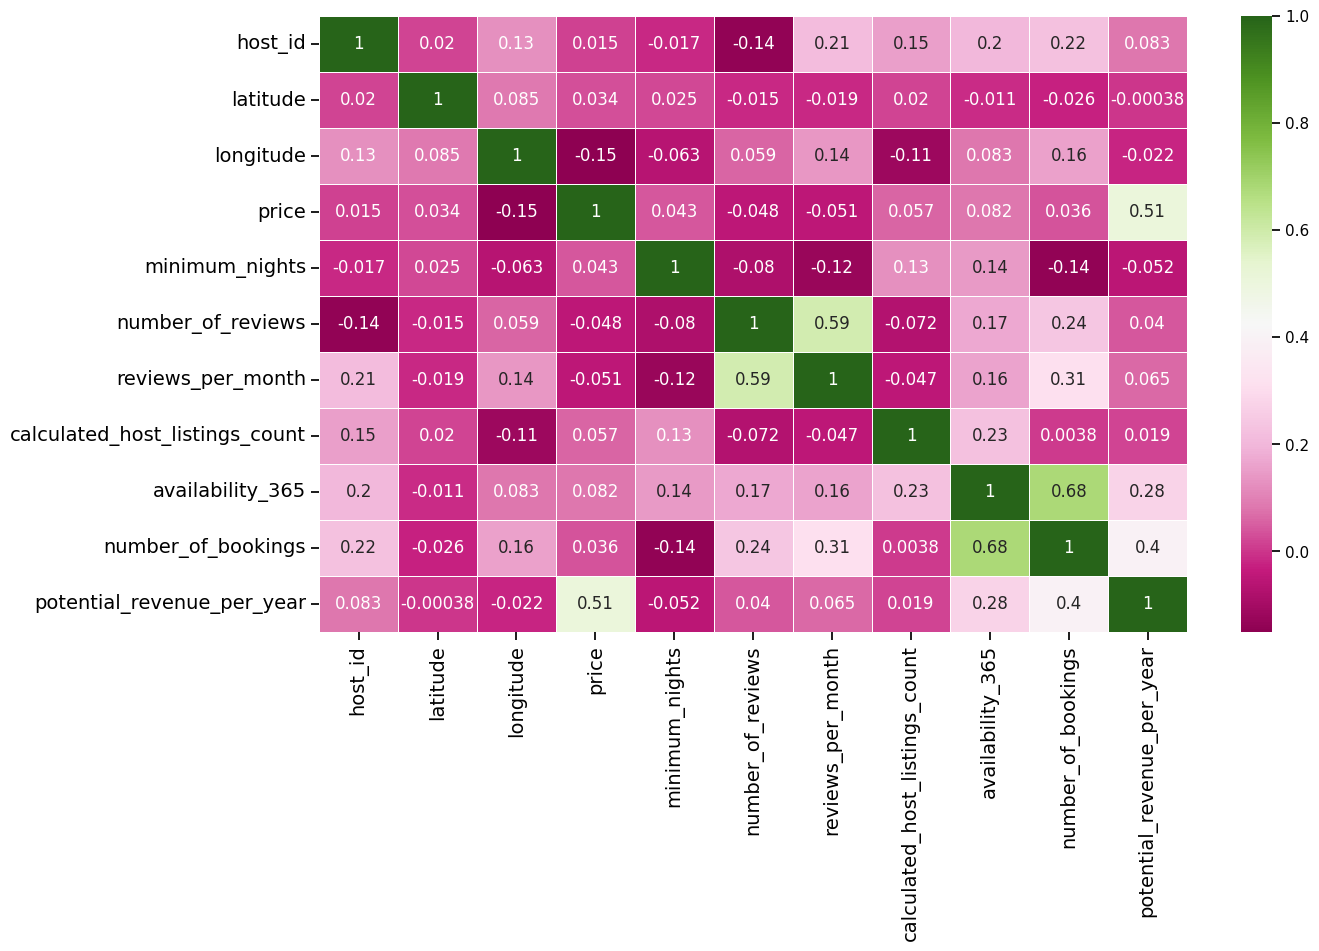

In [ ]:
# Correlation Heatmap visualization code
numeric_df = df.select_dtypes(include='number')

# Set the context for the plot
sns.set_context('notebook')

# Create a figure for the heatmap
plt.figure(figsize=(14, 8))

# Set the font size for the x and y ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Generate the heatmap
sns.heatmap(numeric_df.corr(), annot=True, linewidths=.5, cmap="PiYG")

# Show the plot
plt.show()